In [1]:
from ARC_aolabs3 import ARC_main
import os
import random
import json
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Define the color map
color_map = {
    0: '#000000',  # black
    1: '#0074D9',  # blue
    2: '#FF4136',  # red
    3: '#2ECC40',  # green
    4: '#FFDC00',  # yellow
    5: '#AAAAAA',  # grey
    6: '#F012BE',  # fuschia
    7: '#FF851B',  # orange
    8: '#7FDBFF',  # teal
    9: '#870C25',  # brown
    10: '#4B0082', #dark purple for null color
    11: '#4B0082',
    12: '#4B0082',
    13: '#4B0082',
    13: '#4B0082',
    14: '#4B0082'
}

def plot_colored_image(ax, array_2d, color_map):
    """
    Plot a colored image on the given Axes using the provided color_map.

    Parameters:
    - ax: matplotlib Axes object where the image will be plotted.
    - array_2d: 2D numpy array containing image data.
    - color_map: Dictionary mapping values to hex color codes.
    """
    # Create a colored image based on the array values
    colored_image = np.empty(array_2d.shape + (3,), dtype=np.float32)
    for y in range(array_2d.shape[0]):
        for x in range(array_2d.shape[1]):
            hex_color = color_map[array_2d[y, x]]
            # Convert hex color to RGB tuple
            rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
            # Normalize RGB values to [0, 1] range
            colored_image[y, x] = np.array(rgb_color) / 255.0

    # Display the image on the provided Axes
    ax.imshow(colored_image, aspect='auto')

    # Add grid
    ax.set_xticks(np.arange(-0.5, array_2d.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, array_2d.shape[0], 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    ax.tick_params(which='minor', size=0)

    # Hide the axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])    

In [3]:

path = "E:/aolabs/aolabs2/ARC-AGI/data/training/" 
files = os.listdir(path)

# Randomly sample 10 files from the list
tasks = random.sample(files, 3)  # Picking 2 random files from the training folder
print(tasks)

# tasks = []
# task = 'ff28f65a.json'
# tasks.append(task)
# print(tasks)
   


['b2862040.json', 'a1570a43.json', '8efcae92.json']


The below shell to show input for one file only

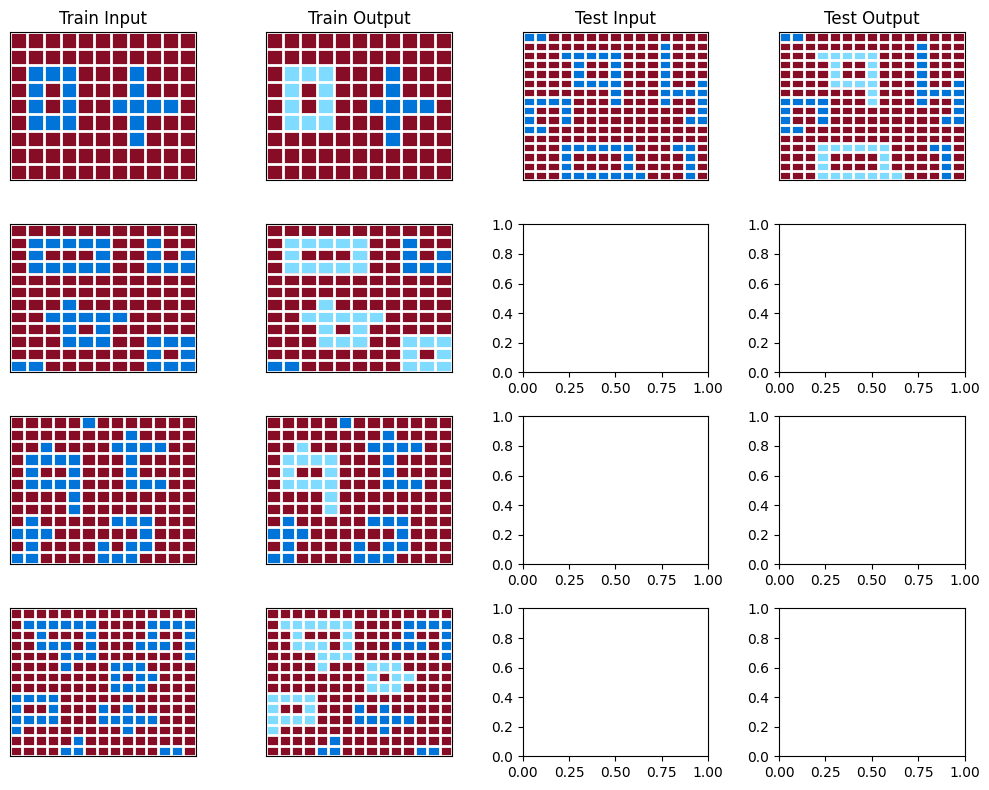

In [4]:
# task_path = path + task
task_path = path + tasks[0]
        # Open the JSON file and load its content
with open(task_path) as task_open:
    task_data = json.load(task_open)


# Number of images to display
num_images_train = len(task_data['train'])
num_images_test = len(task_data['test'])

# Create a figure with four subplots (two for input/output of train and two for input/output of test)
fig, axes = plt.subplots(max(num_images_train, num_images_test), 4, figsize=(10, 2 * max(num_images_train, num_images_test)))

# Set column titles
axes[0, 0].set_title('Train Input')
axes[0, 1].set_title('Train Output')
axes[0, 2].set_title('Test Input')
axes[0, 3].set_title('Test Output')

# Plot train data
for i, train_data in enumerate(task_data['train']):
    # Plot train input image on the first column
    plot_colored_image(axes[i, 0], np.array(train_data['input']), color_map)
    # Plot train output image on the second column
    plot_colored_image(axes[i, 1], np.array(train_data['output']), color_map)

# Plot test data
for i, test_data in enumerate(task_data['test']):
    # Plot test input image on the third column
    plot_colored_image(axes[i, 2], np.array(test_data['input']), color_map)
    # Plot test output image on the fourth column
    plot_colored_image(axes[i, 3], np.array(test_data['output']), color_map)

# Adjust layout for better fit
plt.tight_layout()
plt.show()


In [5]:
#Training part
# We are using one agent ony for all of the tasks and the agent variable below receives stores the agent. 

Data, agent = ARC_main(tasks, neurons_x=20, neurons_y=20, ax=3, dg=2, Z2I_connections=True)

Training going on for task.. b2862040.json


e:\aolabs\aolabs2\myenv\Lib\site-packages\ao_core\ao_core.py:66: RuntimeWarning: invalid value encountered in divide
  normalized_non_firing_counts = non_firing_counts / num_non_firing_outputs
e:\aolabs\aolabs2\myenv\Lib\site-packages\ao_core\ao_core.py:65: RuntimeWarning: invalid value encountered in divide
  normalized_firing_counts = firing_counts / num_firing_outputs


<class 'ao_core.ao_core.Agent'>
Training Done for Task  b2862040.json
Training going on for task.. a1570a43.json
<class 'ao_core.ao_core.Agent'>
Training Done for Task  a1570a43.json
Training going on for task.. 8efcae92.json
<class 'ao_core.ao_core.Agent'>
Training Done for Task  8efcae92.json


In [8]:
#This cell saves the data in the pickle format. 

import pickle
pickle_data = [Data, tasks]
with open('Data_single_agent.pkl', 'wb') as f:
    pickle.dump(pickle_data, f)

In [6]:
def check_output(actual_op, pred_op):

    # Get the shapes of the actual and predicted output arrays
    actual_op = np.array(actual_op)
    pred_op = np.array(pred_op)
    actual_op_size = actual_op.shape
    pred_op_size = pred_op.shape

    # Check if the sizes are the same
    if actual_op_size != pred_op_size:
        print('Wrong solution because of incorrect size')
        return False

    # Compare each element in the actual and predicted output arrays
    for i in range(actual_op_size[0]):
        for j in range(actual_op_size[1]):
            if actual_op[i][j] != pred_op[i][j]:
                print("Wrong output")
                return False
                
    print("Correct output")
    return True

In [19]:
#For understanding purpose...No need to run this cell

for task_index in range(len(tasks)):
    task_data = Data[task_index]
    for test_index in range(len(task_data)):
        task_test_data = task_data[test_index]
        for state_index in range(len(task_test_data)):
            task_test_state_data = task_test_data[state_index]
            task_test_state_data[0] 

In [12]:
# This cell will save all the output plots in the plot folder

# Ensure the 'plots' directory exists
os.makedirs('plots', exist_ok=True)

for task_index in range(len(tasks)):
    task = tasks[task_index]
    task_path = path + task
    
    # Open the JSON file and load its content
    with open(task_path) as task_open:
        task_data = json.load(task_open)

    pred_data = Data[task_index]
    
    # Loop through each test index
    for test_index in range(len(pred_data)):
        task_test_data = pred_data[test_index]  # Access the test data
        num_states = len(task_test_data)
        
        # Create subplots for each test index, with 3 columns (Z Output, Q State, Test Output)
        fig, axes = plt.subplots(num_states, 3, figsize=(10, 3 * num_states))  # Adjusted width
        
        # Set the figure title as the task name and test index
        fig.suptitle(f'Task: {tasks[task_index]}, Test Index: {test_index + 1}', fontsize=16)
        
        for state_index in range(num_states):
            task_test_state_data = task_test_data[state_index]  # Access the state data
            
            # Set titles for the Z Output, Q State, and Test Output plots
            axes[state_index, 0].set_title(f'State {state_index + 1} - Z Output')
            axes[state_index, 1].set_title(f'State {state_index + 1} - Q State')
            axes[state_index, 2].set_title('Actual Output')

            # Plot Z output in the first column
            plot_colored_image(axes[state_index, 0], np.array(task_test_state_data[0]), color_map)
            # Plot Q state in the second column
            plot_colored_image(axes[state_index, 1], np.array(task_test_state_data[1]), color_map)
            # Plot test output in the third column (assuming it's always at index 0)
            test_output_data = task_data['test'][test_index]['output']  # Accessing output from the task test state data
            plot_colored_image(axes[state_index, 2], np.array(test_output_data), color_map)
            # print(check_output(test_output_data, task_test_state_data[0]))

        # Save the figure instead of showing it
        save_path = f'plots/{tasks[task_index].split(".")[0]}_testcase{test_index + 1}.jpg'
        plt.savefig(save_path, format='jpg', dpi=300)
        
        # Close the figure to free memory
        plt.close(fig)
